# 第二章：预备知识

In [2]:
import torch

## 2.1 数据操作
- arange()
- reshape()
- shape
- numel()
- zeros(), ones()
- randn()
- tensor()
- +, -, *, /, ** 运算符
- cat(), dim轴
- ==, >， < 比较符
- 广播机制
- 切片
- 索引
- 深浅拷贝
- 对象互转

In [2]:
#arange函数，从0到指定数
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [12]:
#reshape函数，重置大小
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [13]:
#检查形状
X.shape

torch.Size([3, 4])

In [16]:
#检查元素总数
X.numel()

12

In [18]:
#全0，全1矩阵
torch.zeros((2,3,4))
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [19]:
#随机矩阵，满足正态分布，均值为0，标准差为1
torch.randn(3, 4)

tensor([[ 1.4466, -0.7348,  0.1337,  1.3211],
        [-0.0220,  0.3600, -0.5758,  2.3225],
        [ 0.4099,  0.0531,  1.3826,  1.1591]])

In [20]:
#直接赋值，外层列表为轴0，内层为轴1
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [21]:
#运算符是“按元素”相加减
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y

tensor([ 3.,  4.,  6., 10.])

In [22]:
#cat连结，dim选择轴
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim = 1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [23]:
#对应位置比较，相等为True，否则为False
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [26]:
#广播机制，沿数组中长度为1的轴进行广播
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [28]:
#切片,注意从0开始，左闭右开
X = torch.tensor([1, 2, 3, 4, 5])
X[-1], X[1:3]

(tensor(5), tensor([2, 3]))

In [33]:
#索引
X = torch.arange(12).reshape(3, 4)
X[1, 2] = 9
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

In [34]:
X[0:2, :] = 12
X

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

In [35]:
#Y = Y + X是将Y+X赋到新的内存空间，然后将Y指向这个内存地址
#Y[:] = Y + X是将Y+X赋到Y本来的内存空间
X = torch.tensor([1, 2, 3])
Y = torch.tensor([2, 3, 4])
before = id(Y)
Y[:] = Y + X
#Y = Y + X
id(Y) == before

True

In [36]:
#对象互转
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [37]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2 数据预处理
- pandas读取数据集
- fillna()填充缺失值
- get_dummies()填充离散异常值

In [38]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')# 列名
    f.write('NA,Pave,127500\n')# 每⾏表⽰⼀个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [39]:
#数据预处理，读取数据集
#!pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [42]:
#填充缺失值，数值使用均值填充
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
#print(inputs,outputs)
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [43]:
#对于类别值或离散值，将NaN视为一个类别
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [44]:
#转换为张量
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

## 2.3 线性代数
- 矩阵
- clone()
- sum(): 全求和， 降维求和， 非降维求和
- cumsum(): 累积求和
- dot(): 点积
- mv(): 矩阵-向量积
- mm(): 矩阵-矩阵积
- torch.norm(): L2范数

In [10]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() #clone拷贝副本
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [11]:
x = torch.arange(4, dtype=torch.float32)
x.sum() #求和

tensor(6.)

In [12]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [16]:
#按某一轴求和，降维求和
A_sum_axis0 = A.sum(axis = 0)
A, A_sum_axis0, A_sum_axis0.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([40., 45., 50., 55.]),
 torch.Size([4]))

In [17]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [18]:
#保留轴数不变，非降维求和
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [19]:
#cumsum累积求和
A, A.cumsum(axis=0)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]))

In [21]:
#dot点积
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [22]:
#矩阵-向量积
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [23]:
#矩阵-矩阵积
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

In [24]:
#L2范数
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

## 2.4 微积分
- plot()函数编写及设置
- 模拟取极限

In [5]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x


In [6]:
#模拟取极限
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [13]:
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, 
         xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-', 'r:'),figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
    
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    def has_one_axis(X):
        return (hasattr(X, 'ndim') and X.ndim == 1 or isinstance(X, list)
               and not hasattr(X[0], '__len__'))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    
    

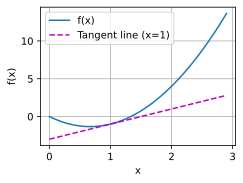

In [14]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.5 自动微分
- 隐式计算图
- 自动微分
    - 标量
    - 非标量
    - 分离计算
    - 控制流梯度

In [2]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
x.requires_grad_(True) # 等价于x=torch.arange(4.0, requires_grad=True)
x.grad
y = 2 * torch.dot(x, x)
y.backward()
x.grad == 4 * x

tensor([True, True, True, True])

In [4]:
x.grad.zero_() #梯度清零，pytorch有累积梯度的机制。函数后又下划线表示对变量本身操作
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
#非标量变量的反向传播
x.grad.zero_()
y = x * x
#等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [8]:
#分离计算，detach使得系统将u看作常数而不是关于x的表达式
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [11]:
#控制流梯度计算
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor(True)

## 2.6 概率

In [12]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [13]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

## 2.7 查阅文档

In [14]:
#dir函数
import torch

print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [15]:
#help函数
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None